<a href="https://colab.research.google.com/github/FathimaNazarudeen/Advanced-Computing-Lab/blob/main/error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/ravdess/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

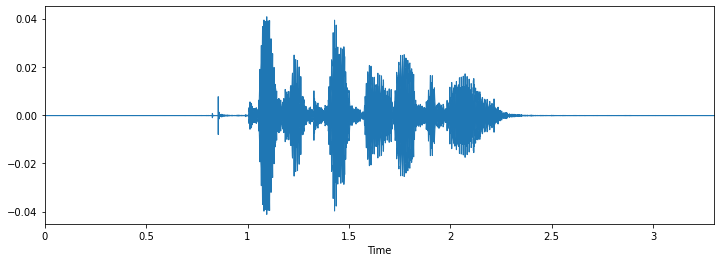

In [4]:

import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [5]:
import numpy as np

In [8]:
path = '/content/drive/MyDrive/ravdess audio'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        file = file[6:8]
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue  

In [9]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [10]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((1440, 40), (1440,))

In [11]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/MyDrive/rav'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [17]:
X = joblib.load('/content/drive/MyDrive/rav/X.joblib')
y = joblib.load('/content/drive/MyDrive/rav/y.joblib')

Decision Tree Classifier

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          01       0.39      0.32      0.35        22
          02       0.49      0.50      0.49        42
          03       0.37      0.30      0.33        33
          04       0.36      0.28      0.32        46
          05       0.54      0.50      0.52        38
          06       0.36      0.55      0.44        31
          07       0.34      0.42      0.38        33
          08       0.44      0.42      0.43        43

    accuracy                           0.41       288
   macro avg       0.41      0.41      0.41       288
weighted avg       0.42      0.41      0.41       288



CNN

In [28]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [29]:

x_traincnn.shape, x_testcnn.shape

((1152, 40, 1), (288, 40, 1))

In [31]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_3 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_2 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_4 (Activation)   (None, 5, 128)            0         
                                                      

In [40]:

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [41]:
cnnhistory=model.fit(x_traincnn, y_train, epochs=1000, validation_data=(x_testcnn, y_test))
     

Epoch 1/1000


ValueError: ignored